In [3]:
cosmetics_without_outliers = pd.read_csv('cosmetics_without_outliers.csv')
cosmetics_without_outliers

,Product_Name,Brand,Category,Usage_Frequency,Price_USD,Rating,Number_of_Reviews,Product_Size,Skin_Type,Gender_Target,Packaging_Type,Main_Ingredient,Cruelty_Free,Country_of_Origin
0,Ultra Face Mask,Drunk Elephant,Blush,Weekly,67.85,1.4,686,30ml,Sensitive,Female,Tube,Retinol,False,Australia
1,Ultra Lipstick,Laura Mercier,Makeup Remover,Occasional,116.43,4.2,5483,250ml,Dry,Unisex,Bottle,Shea Butter,False,UK
2,Ultra Serum,Natasha Denona,Highlighter,Daily,90.84,1.6,5039,100ml,Sensitive,Male,Compact,Aloe Vera,True,Italy
3,Divine Serum,Ilia Beauty,Face Mask,Occasional,55.17,3.2,6202,250ml,Normal,Male,Tube,Glycerin,True,South Korea
4,Super Foundation,Charlotte Tilbury,Highlighter,Occasional,140.56,1.7,297,100ml,Oily,Female,Compact,Glycerin,False,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Magic Eyeliner,Patrick Ta,Face Mask,Daily,131.64,2.8,1470,250ml,Sensitive,Unisex,Tube,Aloe Vera,True,Italy
14996,Perfect Powder,Farsali,Serum,Weekly,76.35,2.1,7652,250ml,Dry,Unisex,Jar,Salicylic Acid,True,USA
14997,Magic Serum,Kiehl’s,Highlighter,Occasional,65.37,4.2,811,30ml,Combination,Unisex,Jar,Shea Butter,False,South Korea
14998,Magic Mascara,Perricone MD,Powder,Weekly,59.93,4.8,5482,250ml,Dry,Male,Jar,Aloe Vera,True,USA


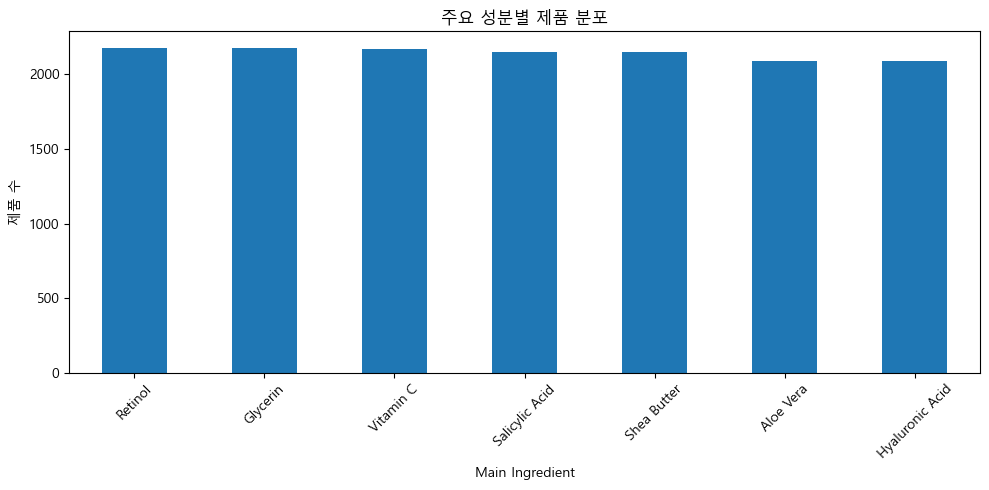

In [6]:
# ...existing code...
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

cosmetics_without_outliers['Main_Ingredient'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('주요 성분별 제품 분포')  # 그래프 제목 한글
plt.xlabel('Main Ingredient')      # x축 영어
plt.ylabel('제품 수')              # y축 한글
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# ...existing code...

In [ ]:
import re

# 용량에서 숫자만 추출하여 ml 단위로 변환
def extract_ml(size_str):
    match = re.search(r'(\d+)', str(size_str))
    return int(match.group(1)) if match else None

cosmetics_without_outliers['Product_Size_ml'] = cosmetics_without_outliers['Product_Size'].apply(extract_ml)

# 용량 구간 설정
bins = [0, 50, 100, 150, 200, 250]
labels = ['0~50ml', '50~100ml', '100~150ml', '150~200ml', '200~250ml']
cosmetics_without_outliers['Size_Group'] = pd.cut(cosmetics_without_outliers['Product_Size_ml'], bins=bins, labels=labels, right=True, include_lowest=True)

# 구간별 평균 가격 계산
avg_price_by_size = cosmetics_without_outliers.groupby('Size_Group')['Price_USD'].mean()

# 시각화
plt.figure(figsize=(8, 5))
avg_price_by_size.plot(kind='bar', color='skyblue')
plt.title('용량 구간별 평균 가격')
plt.xlabel('용량 구간')
plt.ylabel('평균 가격 (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_8936\2547070285.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_size = cosmetics_without_outliers.groupby('Size_Group')['Price_USD'].mean()


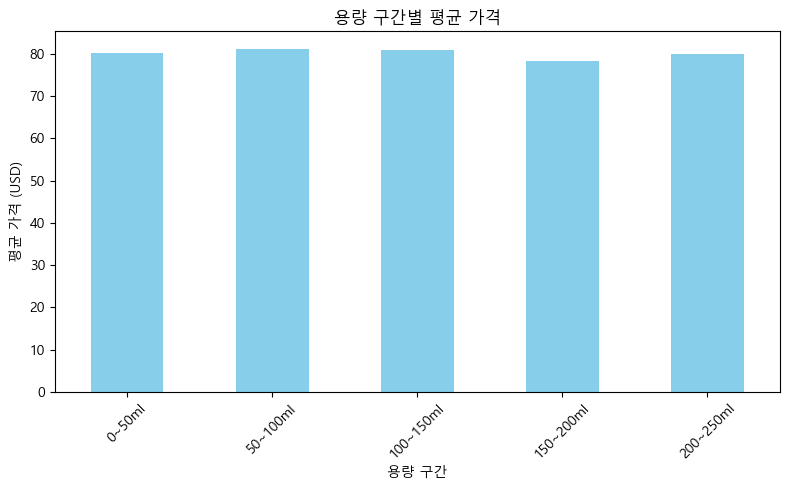

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

import re

# 용량에서 숫자만 추출하여 ml 단위로 변환
def extract_ml(size_str):
    match = re.search(r'(\d+)', str(size_str))
    return int(match.group(1)) if match else None

cosmetics_without_outliers['Product_Size_ml'] = cosmetics_without_outliers['Product_Size'].apply(extract_ml)

# 용량 구간 설정
bins = [0, 50, 100, 150, 200, 250]
labels = ['0~50ml', '50~100ml', '100~150ml', '150~200ml', '200~250ml']
cosmetics_without_outliers['Size_Group'] = pd.cut(
    cosmetics_without_outliers['Product_Size_ml'],
    bins=bins, labels=labels, right=True, include_lowest=True
)

# 구간별 평균 가격 계산
avg_price_by_size = cosmetics_without_outliers.groupby('Size_Group')['Price_USD'].mean()

# 시각화
plt.figure(figsize=(8, 5))
avg_price_by_size.plot(kind='bar', color='skyblue')
plt.title('용량 구간별 평균 가격')
plt.xlabel('용량 구간')
plt.ylabel('평균 가격 (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_8936\3185235536.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating_by_review = cosmetics_without_outliers.groupby('Review_Group')['Rating'].mean()


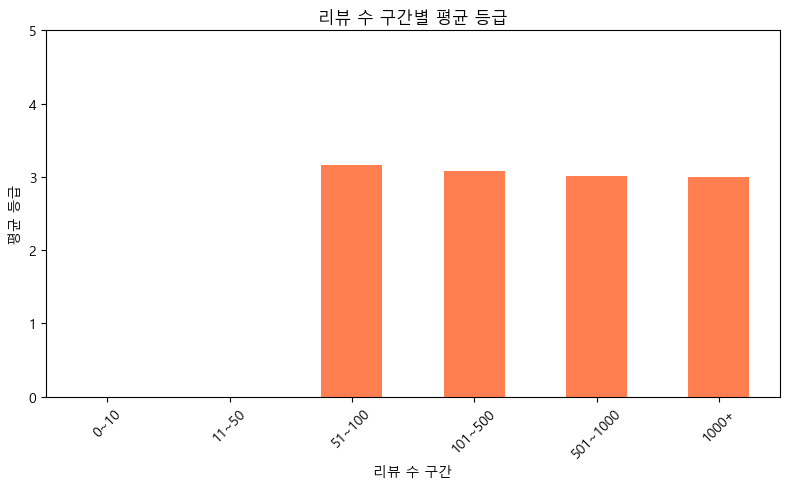

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 리뷰 수 구간 나누기
bins = [0, 10, 50, 100, 500, 1000, cosmetics_without_outliers['Number_of_Reviews'].max()]
labels = ['0~10', '11~50', '51~100', '101~500', '501~1000', '1000+']
cosmetics_without_outliers['Review_Group'] = pd.cut(
    cosmetics_without_outliers['Number_of_Reviews'],
    bins=bins, labels=labels, right=True, include_lowest=True
)

# 구간별 평균 등급 계산
avg_rating_by_review = cosmetics_without_outliers.groupby('Review_Group')['Rating'].mean()

# 시각화
plt.figure(figsize=(8, 5))
avg_rating_by_review.plot(kind='bar', color='coral')
plt.title('리뷰 수 구간별 평균 등급')
plt.xlabel('리뷰 수 구간')
plt.ylabel('평균 등급')
plt.ylim(0, 5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

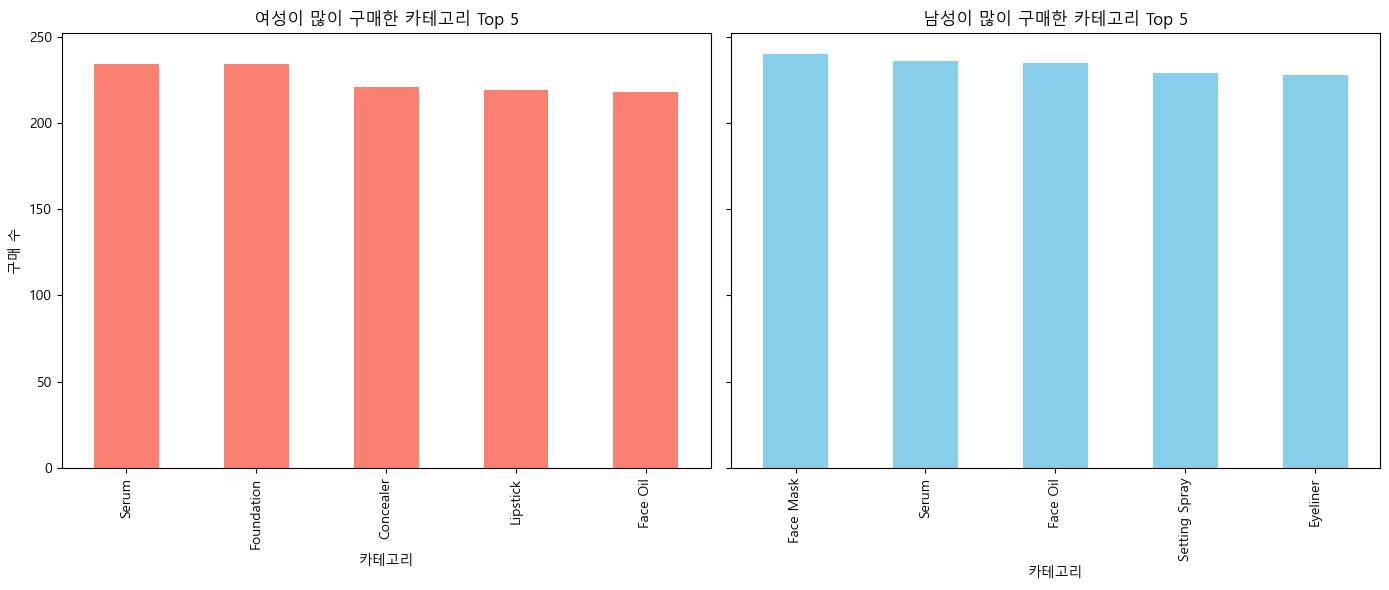

In [18]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 성별-카테고리별 구매수 집계
gender_category_counts = cosmetics_without_outliers.groupby(['Gender_Target', 'Category']).size().unstack(fill_value=0)

# 남성/여성별 상위 5개 카테고리 추출
top_female = gender_category_counts.loc['Female'].sort_values(ascending=False).head(5)
top_male = gender_category_counts.loc['Male'].sort_values(ascending=False).head(5)

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
top_female.plot(kind='bar', ax=axes[0], color='salmon')
axes[0].set_title('여성이 많이 구매한 카테고리 Top 5')
axes[0].set_xlabel('카테고리')
axes[0].set_ylabel('구매 수')

top_male.plot(kind='bar', ax=axes[1], color='skyblue')
axes[1].set_title('남성이 많이 구매한 카테고리 Top 5')
axes[1].set_xlabel('카테고리')

plt.tight_layout()
plt.show()

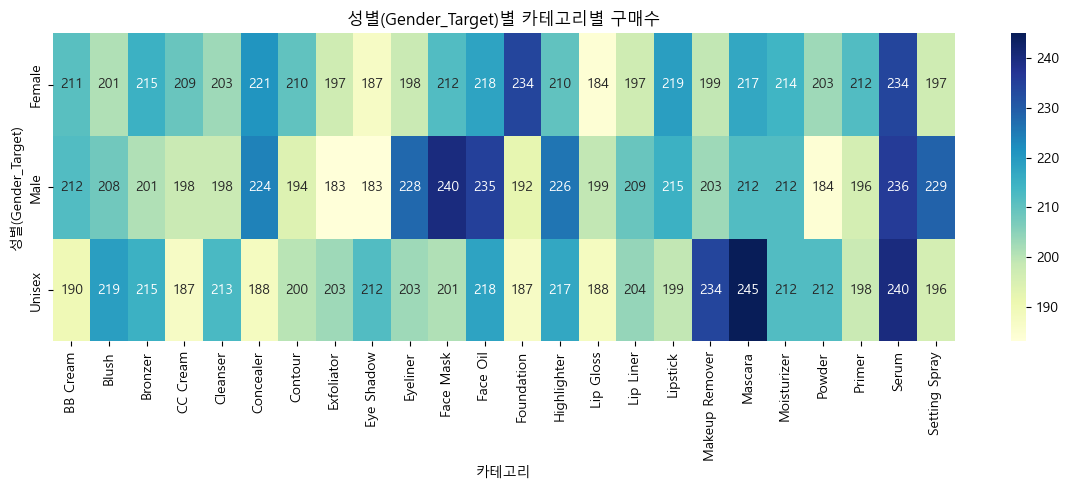

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 피벗 테이블 생성: 행=Gender_Target, 열=Category, 값=구매수
pivot = cosmetics_without_outliers.pivot_table(
    index='Gender_Target',
    columns='Category',
    values='Product_Name',  # 제품명 또는 다른 컬럼 아무거나 count용
    aggfunc='count',
    fill_value=0
)

plt.figure(figsize=(12, 5))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('성별(Gender_Target)별 카테고리별 구매수')
plt.xlabel('카테고리')
plt.ylabel('성별(Gender_Target)')
plt.tight_layout()
plt.show()

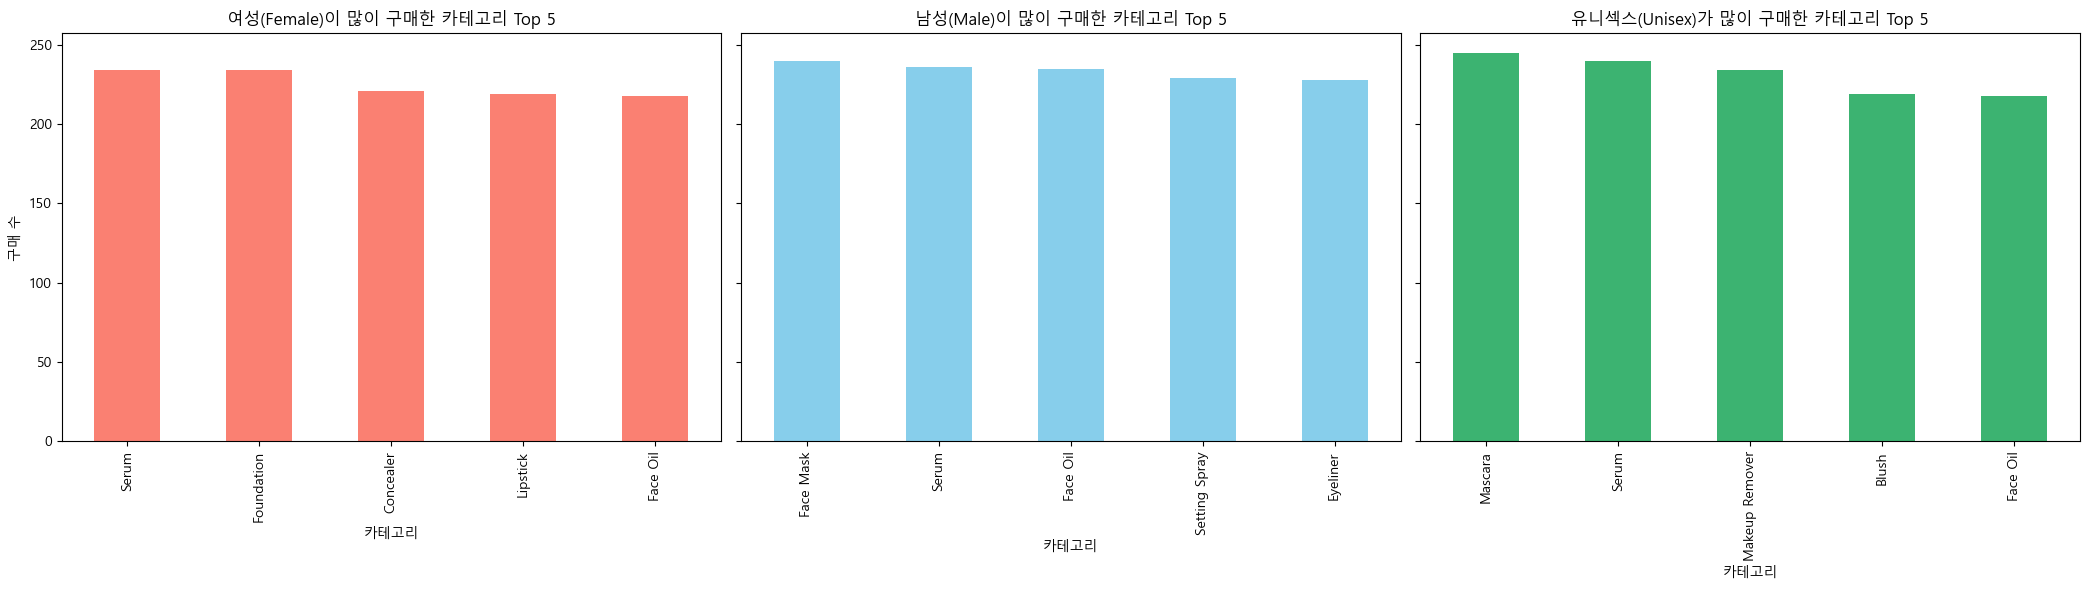

In [20]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 성별-카테고리별 구매수 집계
gender_category_counts = cosmetics_without_outliers.groupby(['Gender_Target', 'Category']).size().unstack(fill_value=0)

# 각 성별별 상위 5개 카테고리 추출
top_female = gender_category_counts.loc['Female'].sort_values(ascending=False).head(5)
top_male = gender_category_counts.loc['Male'].sort_values(ascending=False).head(5)
top_unisex = gender_category_counts.loc['Unisex'].sort_values(ascending=False).head(5)

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(21, 6), sharey=True)
top_female.plot(kind='bar', ax=axes[0], color='salmon')
axes[0].set_title('여성(Female)이 많이 구매한 카테고리 Top 5')
axes[0].set_xlabel('카테고리')
axes[0].set_ylabel('구매 수')

top_male.plot(kind='bar', ax=axes[1], color='skyblue')
axes[1].set_title('남성(Male)이 많이 구매한 카테고리 Top 5')
axes[1].set_xlabel('카테고리')

top_unisex.plot(kind='bar', ax=axes[2], color='mediumseagreen')
axes[2].set_title('유니섹스(Unisex)가 많이 구매한 카테고리 Top 5')
axes[2].set_xlabel('카테고리')

plt.tight_layout()
plt.show()